## Chapter 1.1
Notebook on comparison between canonic corpus and periodicals.

In [87]:
library(tidyverse)

library(ggrepel)
library(wesanderson)

theme_set(theme_minimal())

In [5]:
load("../../data/nkrja_19th_lem.Rda")
glimpse(c19)

Rows: 15,569
Columns: 41
$ Unnamed..0          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ path                <chr> "xix/1790-1810_poets/poets-001", "xix/1790-1810_po…
$ author              <chr> "С. С. Бобров", "С. С. Бобров", "С. С. Бобров", "С…
$ dub                 <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ original            <chr> "", "", "Гораций", "", "", "", "", "", "", "", "",…
$ language            <chr> "", "", "латинский", "", "", "", "", "", "", "", "…
$ header              <chr> "Царство всеобщей любви : «Еще вкруг солнцев не вр…
$ cyclus              <chr> "", "", "", "", "", "", "", "", "", "", "", "", ""…
$ liber               <chr> "", "", "", "", "", "", "", "", "", "", "", "", ""…
$ created             <chr> "1785", "1785", "1787", "1789", "1789", "1789", "1…
$ start               <dbl> 1785, 1785, 1787, 1789, 1789, 1789, 1792, 1800, 18…
$ end                 <dbl> NA, NA, NA, NA, NA, NA, 1800, NA, NA, 1803, 1803, …
$ exact        

Create 1830-1840 and 1835-1840 sets

In [6]:
nkrja_1835 <- c19 %>% filter(year > 1834 & year < 1841)
nkrja_1830 <- c19 %>% filter(year > 1829 & year < 1841)

### General NKRJA overview

Create a function for displaying stats

In [24]:
stats_nkrja <- function(corpus) {
    print("Number of unique authors:")
    print(length(unique(corpus$author)))

    print("Number of poems:")
    print(nrow(corpus))

    print("Top authors:")
    corpus %>% 
        group_by(author) %>% 
        count(sort = T) %>% 
        mutate(perc = n / nrow(corpus) * 100) %>% 
        head(15) %>% print
    
    print("Sources:")
    
    corpus %>% 
        group_by(source) %>% 
        count(sort = T) %>% 
        mutate(perc = n/nrow(corpus)*100)
    }

#### 1835-1840

In [25]:
stats_nkrja(nkrja_1835)

[1] "Number of unique authors:"
[1] 60
[1] "Number of poems:"
[1] 1212
[1] "Top authors:"
# A tibble: 15 × 3
# Groups:   author [15]
   author               n  perc
   <chr>            <int> <dbl>
 1 В. Г. Бенедиктов   159 13.1 
 2 М. Ю. Лермонтов     82  6.77
 3 А. В. Кольцов       74  6.11
 4 А. С. Пушкин        60  4.95
 5 Н. А. Некрасов      59  4.87
 6 А. А. Фет           53  4.37
 7 В. А. Жуковский     47  3.88
 8 Е. П. Ростопчина    43  3.55
 9 И. П. Мятлев        43  3.55
10 А. Н. Майков        42  3.47
11 П. П. Ершов         40  3.30
12 Ф. И. Тютчев        37  3.05
13 А. И. Полежаев      36  2.97
14 Н. М. Языков        33  2.72
15 Н. П. Огарев        33  2.72
[1] "Sources:"


source,n,perc
<chr>,<int>,<dbl>
"Поэты 1820-1830-х годов. Библиотека поэта. Второе издание. -- Л.: Советский писатель, 1972",166,13.69636964
"В. Г. Бенедиктов. Стихотворения. -- Л.: Советский писатель, 1939. (Библиотека поэта. Большая серия)",159,13.11881188
"М. Ю. Лермонтов. Полное собрание сочинений: В 5 т. -- М. Л.: Academia, 1935-1937",82,6.76567657
"А. В. Кольцов. Полное собрание стихотворений. -- Л.: Сов. писатель, 1939",74,6.10561056
"Н. А. Некрасов. Полное собрание стихотворений: В 3 тт. Библиотека поэта. Большая серия. -- Л.: Советский писатель, 1967",59,4.86798680
"Пушкин А. С. Полное собрание сочинений, 1837-1937: В 16 т. Т. 3",58,4.78547855
"А. А. Фет. Стихотворения и поэмы. Библиотека поэта. Большая серия. Третье издание. -- Л.: Советский писатель, 1986",53,4.37293729
"Жуковский В. А. Полное собрание сочинений и писем. М.: Языки славянской культуры, 2000-",47,3.87788779
"Евдокия Ростопчина. Стихотворения Проза Письма. -- М., Сов. Россия, 1986",43,3.54785479


#### 1830-1840

In [26]:
stats_nkrja(nkrja_1830)

[1] "Number of unique authors:"
[1] 82
[1] "Number of poems:"
[1] 2409
[1] "Top authors:"
# A tibble: 15 × 3
# Groups:   author [15]
   author                n  perc
   <chr>             <int> <dbl>
 1 М. Ю. Лермонтов     357 14.8 
 2 А. С. Пушкин        194  8.05
 3 В. Г. Бенедиктов    165  6.85
 4 В. А. Жуковский     116  4.82
 5 А. В. Кольцов       113  4.69
 6 Н. М. Языков        101  4.19
 7 А. И. Полежаев      100  4.15
 8 Ф. И. Тютчев         67  2.78
 9 Н. А. Некрасов       59  2.45
10 И. П. Мятлев         57  2.37
11 Е. П. Ростопчина     56  2.32
12 А. А. Фет            53  2.20
13 Е. А. Баратынский    52  2.16
14 П. П. Ершов          49  2.03
15 А. И. Одоевский      47  1.95
[1] "Sources:"


source,n,perc
<chr>,<int>,<dbl>
"Поэты 1820-1830-х годов. Библиотека поэта. Второе издание. -- Л.: Советский писатель, 1972",361,14.985471
"М. Ю. Лермонтов. Полное собрание сочинений: В 5 т. -- М. Л.: Academia, 1935-1937",357,14.819427
"Пушкин А. С. Полное собрание сочинений, 1837-1937: В 16 т. Т. 3",178,7.388958
"В. Г. Бенедиктов. Стихотворения. -- Л.: Советский писатель, 1939. (Библиотека поэта. Большая серия)",165,6.849315
"Жуковский В. А. Полное собрание сочинений и писем. М.: Языки славянской культуры, 2000-",116,4.815276
"А. В. Кольцов. Полное собрание стихотворений. -- Л.: Сов. писатель, 1939",113,4.690743
Н. М. Языков. Полное собрание стихотворений,101,4.192611
"А. Полежаев. Стихотворения и поэмы. Библиотека поэта. Большая серия. -- Л.: Советский писатель, 1957",100,4.151100
Тютчев Ф. И. Полное собрание стихотворений,67,2.781237


Plots & charts

In [57]:
r35 <- nkrja_1835 %>% 
    count(author, sort = T) %>% 
    mutate(rank = row_number(), group = "r35")

r30 <- nkrja_1830 %>% 
    count(author, sort = T) %>% 
    mutate(rank = row_number(), group = "r30")

rankings_plot <- rbind(r35, r30)

head(rankings_plot)

,author,n,rank,group
,<chr>,<int>,<int>,<chr>
1,В. Г. Бенедиктов,159,1,r35
2,М. Ю. Лермонтов,82,2,r35
3,А. В. Кольцов,74,3,r35
4,А. С. Пушкин,60,4,r35
5,Н. А. Некрасов,59,5,r35
6,А. А. Фет,53,6,r35


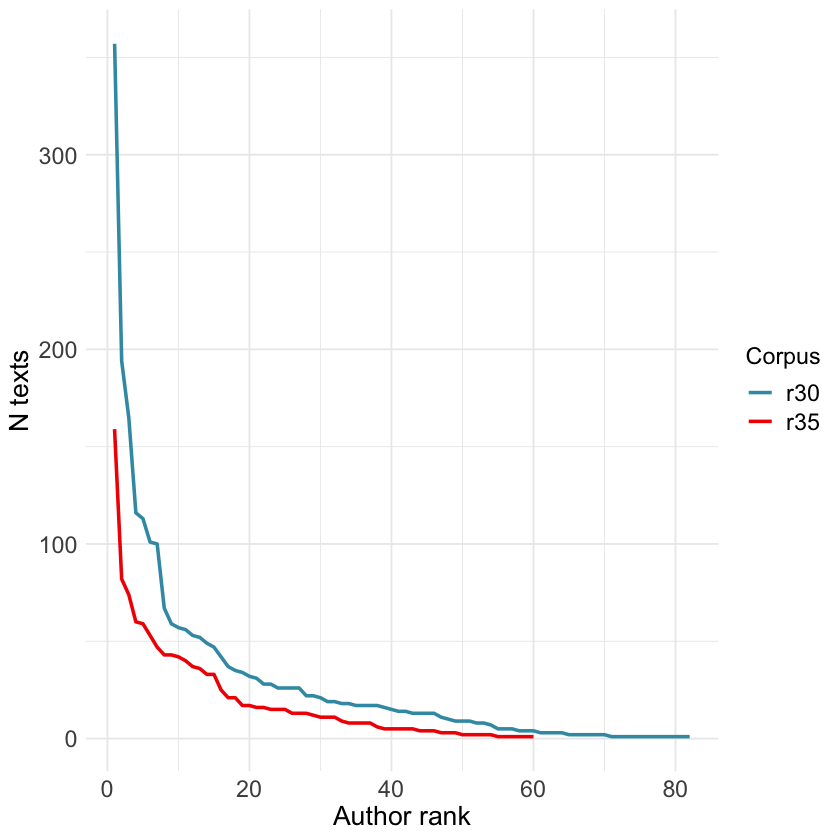

In [59]:
p1 <- rankings_plot %>% 
    ggplot(aes(x = rank, y = n, group = group, color = group)) + 
    geom_line(size = 1) + 
    scale_color_manual(values = c(wes_palette("Zissou1")[1], wes_palette("Zissou1")[5])) +
    theme(axis.text = element_text(size = 14), 
          axis.title = element_text(size = 16),
          legend.text = element_text(size = 14), 
          legend.title = element_text(size = 14)) 

p1 + labs(x = "Author rank", 
         y = "N texts", 
         color = "Corpus")

In [ ]:
# annotation with annotate()
#p1 + labs(x = "Author rank", 
#         y = "N texts", 
#         color = "Corpus") + 
#    # add custom points & lables
#    geom_point(aes(x = 2, y = 194), size = 2) + 
#    annotate("segment", x = 12, y = 214, xend = 4, yend = 197, 
#              arrow = arrow(type = "closed", length = unit(0.02, "npc"))) + 
#    annotate("text", x = 20, y = 216, label = "Pushkin", size = 14/.pt)

,author,n,rank,group
,<chr>,<int>,<int>,<chr>
1,М. Ю. Лермонтов,357,1,r30
2,А. С. Пушкин,194,2,r30
3,В. Г. Бенедиктов,165,3,r30


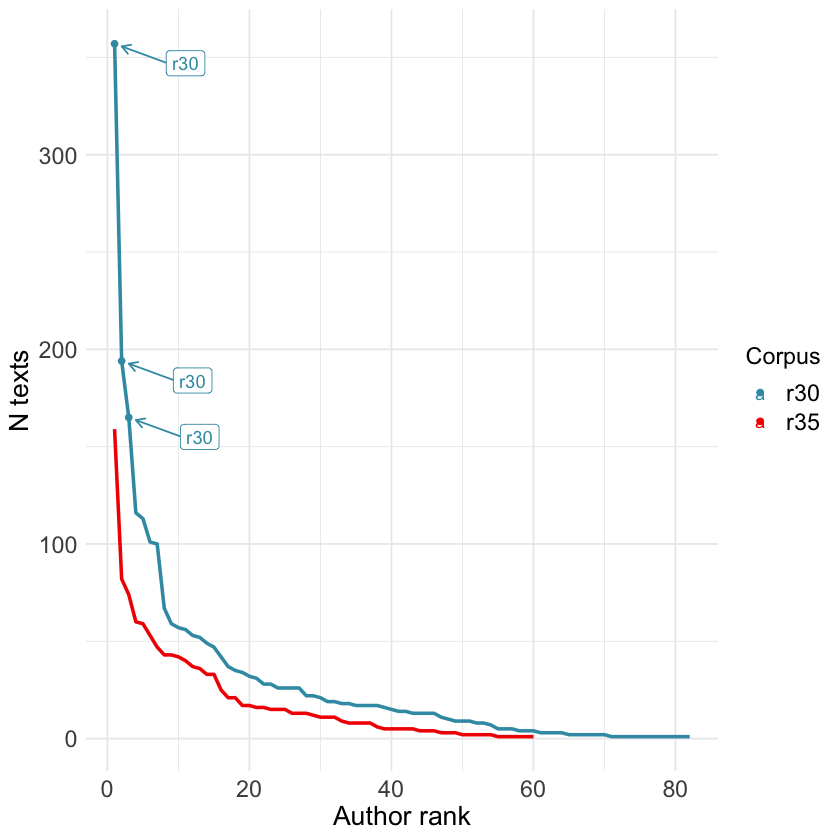

In [112]:
top3 <- rankings_plot %>% filter(group == "r30") %>% head(3)
top3
p1 + geom_label_repel(data = top3, aes(x = rank, y = n, label = group), 
                      point.padding = 0.5, 
                     nudge_x = 10, nudge_y = -10, 
                     arrow = arrow(length = unit(0.015, 'npc'))) + 
    geom_point(data = top3)

## Periodicals data